In [1]:
import pandas as pd
import numpy as np
import pickle
#import sys/
#!conda install --yes --prefix {sys.prefix} anaconda bcolz 
import bcolz


In [26]:
def read_data():
    price_data = pd.read_csv("../Datasets/djia/upload_DJIA_table.csv",parse_dates=[0])
    news_data = pd.read_csv("../Datasets/djia/Combined_News_DJIA.csv",parse_dates=[0])
    return price_data,news_data

In [27]:
price_data,news_data = read_data()

In [28]:
price_data.head(2)

,Date,Open,High,Low,Close,Volume,Adj Close
0,2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141
1,2016-06-30,17712.759766,17930.609375,17711.800781,17929.990234,133030000,17929.990234


In [29]:
news_data.head(2)

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."


In [32]:
merged_dataframe = price_data.merge(news_data, how='inner', on='Date', left_index=True)
# Check the shape and top 5 rows of the merged dataframe
print(merged_dataframe.shape)
merged_dataframe.head(1)

(1989, 33)


,Date,Open,High,Low,Close,Volume,Adj Close,Label,Top1,Top2,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
1988,2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141,1,A 117-year-old woman in Mexico City finally re...,IMF chief backs Athens as permanent Olympic host,...,"The United States has placed Myanmar, Uzbekist...",S&amp;P revises European Union credit rating t...,India gets $1 billion loan from World Bank for...,U.S. sailors detained by Iran spoke too much u...,Mass fish kill in Vietnam solved as Taiwan ste...,Philippines president Rodrigo Duterte urges pe...,Spain arrests three Pakistanis accused of prom...,"Venezuela, where anger over food shortages is ...",A Hindu temple worker has been killed by three...,Ozone layer hole seems to be healing - US &amp...


In [33]:
merged_dataframe.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close', 'Label',
       'Top1', 'Top2', 'Top3', 'Top4', 'Top5', 'Top6', 'Top7', 'Top8', 'Top9',
       'Top10', 'Top11', 'Top12', 'Top13', 'Top14', 'Top15', 'Top16', 'Top17',
       'Top18', 'Top19', 'Top20', 'Top21', 'Top22', 'Top23', 'Top24', 'Top25'],
      dtype='object')

In [34]:
data = merged_dataframe[['Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close', 'Label']]

In [35]:
import torch
import torch.nn as nn

In [219]:
#---------------------------------------------------------------------------------------------------------
def create_emb_layer(weights_matrix, non_trainable=False):
    vocab_size, embedding_dim = weights_matrix.shape
    emb_layer = nn.Embedding(vocab_size, embedding_dim )#padding_idx=0)
    emb_layer.weight.data.copy_(torch.from_numpy(weights_matrix).to(device))
    
    if non_trainable:
        emb_layer.weight.requires_grad = False

    return emb_layer,embedding_dim   

    
#---------------------------------------------------------------------------------------------------------
class NN(nn.Module):
    def __init__(self,input_size, hidden_dim, n_layers, 
                 bidirectional):
        
        super().__init__()
        
        #self.embedding, embedding_dim = create_emb_layer(weights_matrix, True)
        
        self.fc1 = nn.Linear(input_size, hidden_dim * 2)##############################
        self.fc2 = nn.Linear(hidden_dim * 2, 1)
        
        self.dropout = nn.Dropout(0.3)
                
        self.sigmoid = nn.Sigmoid()
        
        
    def forward(self, X_train):
        
        #embedded_codes = self.dropout(self.embedding(codes))
        
        #packed_embedded = nn.utils.rnn.pack_padded_sequence(embedded_codes, code_lengths, batch_first=True, enforce_sorted=False)

        #packed_output, (hidden, cell) = self.lstm(packed_embedded)

        #output, output_lengths = nn.utils.rnn.pad_packed_sequence(packed_output)
        
        #hidden = self.dropout(torch.cat((hidden[-2,:,:], hidden[-1,:,:]), dim = 1))

        
        #hidden = self.lstm()

        fc1_out = self.fc1(X_train)
        
        
        hidden2 = self.sigmoid(fc1_out)
        
        fc2_out = self.fc2(hidden2)
        
        sigmoid_out = self.sigmoid(fc2_out)
            
        return sigmoid_out
    

In [223]:
import datetime
import torch.optim as optim

def train_model(model, val_dl, epochs=10, lr=0.0001):
    directory = datetime.datetime.now().strftime("%X").replace(":","_")

    parameters = filter(lambda p: p.requires_grad, model.parameters())
    optimizer = optim.Adam(parameters, lr=lr)
    loss_list = []
    f_list = []
    for epoch in range(epochs):
        model.train()
        sum_loss = 0.0
        total = 0
        for x,y in train_dl:
            x = x.float()
            y = y.float()
            y = y.flatten()
            y = torch.tensor(y, dtype=torch.float) 
            x = x.to(device)
            

            y_pred = model(x)
            y_pred = y_pred.cpu()
            optimizer.zero_grad()
            
            loss = nn.BCELoss()(y_pred, y)
            #loss = nn.BCEWithLogitsLoss()(y_pred, y.reshape(-1,1))
            
            loss.backward()
            optimizer.step()
            sum_loss += loss.item()*y.shape[0]
            total += y.shape[0]
        loss_list.append(sum_loss/total)
        val_loss, val_acc, f = validation_metrics(model, val_dl)
        if epoch % 5 == 1:
            print("Epoch: "+str(epoch))
            print("train loss %.3f, val loss %.3f, and val accuracy %.3f " % (sum_loss/total, val_loss, val_acc))
            #print("Recall: "+ str(f["recall"]))
            #print("Precision: "+ str(f["precision"]))
            print("F-measure: "+ str(f["f_measure"]))
            
            save_model(directory,model,optimizer,epoch, loss, f["f_measure"])
            f_list.append(f["f_measure"])

    return loss_list, f_list
def validation_metrics (model, valid_dl):
    model.eval()
    correct = 0
    tp = 0
    tn = 0
    fp = 0
    fn = 0
    total = 0
    sum_loss = 0.0
    sum_rmse = 0.0
    for x,y in valid_dl:
        x = x.float()
        y = y.float()
        y = y.flatten()
        y = torch.tensor(y, dtype=torch.float)  
        x = x.to(device)

        
        y_hat = model(x)
        y_hat = y_hat.cpu()
        
        loss = nn.BCELoss()(y_hat, y)
        #loss = nn.BCEWithLogitsLoss()(y_hat, y.reshape(-1,1))
        #print(y_hat)
        pred = (y_hat>0.5).float()
        #pred = torch.round(torch.sigmoid(y_hat))
        #print(pred.shape)
        #print(pred)
        y = y.reshape(-1,1)
        tp += ((pred == 1)&(y == 1)).float().sum() 
        tn += ((pred == 0)&(y == 0)).float().sum() 
        fp += ((pred == 1)&(y == 0)).float().sum() 
        fn += ((pred == 0)&(y == 1)).float().sum() 
        
        total += y.shape[0]
        sum_loss += loss.item()*y.shape[0]
        
    print(tp)
    print(fp)
    print(tn)
    print(fn)
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    f_measure = (2 * precision * recall) / (precision + recall)
    accuracy = (tp+tn)/(tp+tn+fp+fn)
        
    f = {"precision": precision.item(), "recall":recall.item(), "f_measure": f_measure.item(), "accuracy": accuracy.item()}
    return sum_loss/total, accuracy, f

In [224]:
# Create target Directory if don't exist
import os 

def save_model(directory, model,optimizer, epoch, loss, val_f_measure):
    dirName = "models/"+datetime.datetime.now().strftime("%x").replace("/","_")

    if not os.path.exists(dirName):
        os.mkdir(dirName)
        
    if not os.path.exists(dirName + "/"+directory):
        os.mkdir(dirName + "/"+directory) 
    
    PATH = dirName + "/"+directory+"/"+datetime.datetime.now().strftime("%X").replace(":","_")
       
    torch.save({
                'epoch': epoch,
                'model_state_dict': model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'loss': loss,
                'val_f_measure': val_f_measure
                }, PATH)

In [225]:
from torch.utils.data import Dataset, DataLoader
class CodesDataset(Dataset):
    def __init__(self, X, Y):
        self.X = X
        self.y = Y
        
    def __len__(self):
        return len(self.y)
    
    def __getitem__(self, idx):
        """print(self.X[idx])
        print(self.X[idx][0])
        print(self.X[idx][1])"""

        return torch.from_numpy(np.array(self.X[idx]).astype(np.int32)), self.y[idx]

In [226]:
from sklearn.model_selection import train_test_split
X = data[['Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close']].values
y = data['Label'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [235]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [236]:
train_ds = CodesDataset(X_train, y_train)
test_ds = CodesDataset(X_test, y_test)

In [237]:
batch_size = 1000

train_dl = DataLoader(train_ds, batch_size=batch_size, shuffle=True)
test_dl = DataLoader(test_ds, batch_size=batch_size)

In [238]:
if torch.cuda.is_available():
    device = torch.device("cuda:0")  # you can continue going on here, like cuda:1 cuda:2....etc. 
    print("Running on the GPU")
else:
    device = torch.device("cpu")
    print("Running on the CPU")

Running on the GPU


In [239]:
#CODE_WEIGHT_METRIX = vectors

HIDDEN_DIM = 50
N_LAYERS = 2
BIDIRECTIONAL = True

model = NN(6,
            HIDDEN_DIM,
            N_LAYERS, 
            BIDIRECTIONAL)
model.to(device)

LSTM(
  (lstm): LSTM(6, 50, num_layers=2, dropout=0.3, bidirectional=True)
  (fc1): Linear(in_features=6, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=1, bias=True)
  (dropout): Dropout(p=0.3, inplace=False)
  (sigmoid): Sigmoid()
)

In [243]:
loss_list, f_list = train_model(model, test_dl, epochs=1000, lr=0.05)

<ipython-input-223-960403015b17>:19: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y, dtype=torch.float)
<ipython-input-223-960403015b17>:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y, dtype=torch.float)


tensor(318.)
tensor(286.)
tensor(33.)
tensor(20.)
tensor(10.)
tensor(2.)
tensor(317.)
tensor(328.)
Epoch: 1
train loss 0.690, val loss 0.764, and val accuracy 0.498 
F-measure: 0.05714285746216774
tensor(249.)
tensor(217.)
tensor(102.)
tensor(89.)
tensor(332.)
tensor(305.)
tensor(14.)
tensor(6.)
tensor(321.)
tensor(290.)
tensor(29.)
tensor(17.)
tensor(282.)
tensor(247.)
tensor(72.)
tensor(56.)
tensor(90.)
tensor(78.)
tensor(241.)
tensor(248.)
Epoch: 6
train loss 0.680, val loss 0.698, and val accuracy 0.504 
F-measure: 0.35573121905326843
tensor(315.)
tensor(277.)
tensor(42.)
tensor(23.)
tensor(318.)
tensor(281.)
tensor(38.)
tensor(20.)
tensor(318.)
tensor(281.)
tensor(38.)
tensor(20.)
tensor(309.)
tensor(272.)
tensor(47.)
tensor(29.)
tensor(118.)
tensor(108.)
tensor(211.)
tensor(220.)
Epoch: 11
train loss 0.668, val loss 0.683, and val accuracy 0.501 
F-measure: 0.41843968629837036
tensor(312.)
tensor(276.)
tensor(43.)
tensor(26.)
tensor(321.)
tensor(290.)
tensor(29.)
tensor(17.)
tens

tensor(315.)
tensor(277.)
tensor(42.)
tensor(23.)
tensor(309.)
tensor(272.)
tensor(47.)
tensor(29.)
tensor(315.)
tensor(285.)
tensor(34.)
tensor(23.)
Epoch: 121
train loss 0.663, val loss 0.683, and val accuracy 0.531 
F-measure: 0.6716418266296387
tensor(315.)
tensor(285.)
tensor(34.)
tensor(23.)
tensor(309.)
tensor(272.)
tensor(47.)
tensor(29.)
tensor(312.)
tensor(281.)
tensor(38.)
tensor(26.)
tensor(318.)
tensor(286.)
tensor(33.)
tensor(20.)
tensor(318.)
tensor(286.)
tensor(33.)
tensor(20.)
Epoch: 126
train loss 0.667, val loss 0.687, and val accuracy 0.534 
F-measure: 0.675159215927124
tensor(315.)
tensor(277.)
tensor(42.)
tensor(23.)
tensor(312.)
tensor(281.)
tensor(38.)
tensor(26.)
tensor(312.)
tensor(281.)
tensor(38.)
tensor(26.)
tensor(312.)
tensor(281.)
tensor(38.)
tensor(26.)
tensor(318.)
tensor(286.)
tensor(33.)
tensor(20.)
Epoch: 131
train loss 0.663, val loss 0.685, and val accuracy 0.534 
F-measure: 0.675159215927124
tensor(318.)
tensor(286.)
tensor(33.)
tensor(20.)
tenso

tensor(315.)
tensor(277.)
tensor(42.)
tensor(23.)
tensor(315.)
tensor(277.)
tensor(42.)
tensor(23.)
tensor(309.)
tensor(272.)
tensor(47.)
tensor(29.)
tensor(309.)
tensor(272.)
tensor(47.)
tensor(29.)
tensor(315.)
tensor(277.)
tensor(42.)
tensor(23.)
Epoch: 241
train loss 0.662, val loss 0.684, and val accuracy 0.543 
F-measure: 0.6774193644523621
tensor(318.)
tensor(286.)
tensor(33.)
tensor(20.)
tensor(321.)
tensor(290.)
tensor(29.)
tensor(17.)
tensor(318.)
tensor(286.)
tensor(33.)
tensor(20.)
tensor(309.)
tensor(272.)
tensor(47.)
tensor(29.)
tensor(309.)
tensor(272.)
tensor(47.)
tensor(29.)
Epoch: 246
train loss 0.663, val loss 0.682, and val accuracy 0.542 
F-measure: 0.6724700927734375
tensor(309.)
tensor(272.)
tensor(47.)
tensor(29.)
tensor(315.)
tensor(277.)
tensor(42.)
tensor(23.)
tensor(321.)
tensor(290.)
tensor(29.)
tensor(17.)
tensor(294.)
tensor(259.)
tensor(60.)
tensor(44.)
tensor(287.)
tensor(254.)
tensor(65.)
tensor(51.)
Epoch: 251
train loss 0.667, val loss 0.687, and val

tensor(315.)
tensor(277.)
tensor(42.)
tensor(23.)
Epoch: 361
train loss 0.663, val loss 0.684, and val accuracy 0.543 
F-measure: 0.6774193644523621
tensor(315.)
tensor(277.)
tensor(42.)
tensor(23.)
tensor(309.)
tensor(272.)
tensor(47.)
tensor(29.)
tensor(315.)
tensor(285.)
tensor(34.)
tensor(23.)
tensor(312.)
tensor(281.)
tensor(38.)
tensor(26.)
tensor(307.)
tensor(271.)
tensor(48.)
tensor(31.)
Epoch: 366
train loss 0.664, val loss 0.681, and val accuracy 0.540 
F-measure: 0.6703056693077087
tensor(315.)
tensor(277.)
tensor(42.)
tensor(23.)
tensor(315.)
tensor(277.)
tensor(42.)
tensor(23.)
tensor(313.)
tensor(276.)
tensor(43.)
tensor(25.)
tensor(316.)
tensor(285.)
tensor(34.)
tensor(22.)
tensor(321.)
tensor(290.)
tensor(29.)
tensor(17.)
Epoch: 371
train loss 0.663, val loss 0.687, and val accuracy 0.533 
F-measure: 0.6765016317367554
tensor(321.)
tensor(290.)
tensor(29.)
tensor(17.)
tensor(315.)
tensor(285.)
tensor(34.)
tensor(23.)
tensor(315.)
tensor(277.)
tensor(42.)
tensor(23.)
ten

tensor(286.)
tensor(33.)
tensor(20.)
tensor(318.)
tensor(286.)
tensor(33.)
tensor(20.)
tensor(315.)
tensor(277.)
tensor(42.)
tensor(23.)
tensor(315.)
tensor(277.)
tensor(42.)
tensor(23.)
tensor(312.)
tensor(281.)
tensor(38.)
tensor(26.)
Epoch: 486
train loss 0.661, val loss 0.683, and val accuracy 0.533 
F-measure: 0.6702470779418945
tensor(315.)
tensor(285.)
tensor(34.)
tensor(23.)
tensor(321.)
tensor(290.)
tensor(29.)
tensor(17.)
tensor(291.)
tensor(250.)
tensor(69.)
tensor(47.)
tensor(315.)
tensor(277.)
tensor(42.)
tensor(23.)
tensor(321.)
tensor(290.)
tensor(29.)
tensor(17.)
Epoch: 491
train loss 0.661, val loss 0.693, and val accuracy 0.533 
F-measure: 0.6765016317367554
tensor(315.)
tensor(277.)
tensor(42.)
tensor(23.)
tensor(314.)
tensor(271.)
tensor(48.)
tensor(24.)
tensor(315.)
tensor(277.)
tensor(42.)
tensor(23.)
tensor(318.)
tensor(281.)
tensor(38.)
tensor(20.)
tensor(315.)
tensor(277.)
tensor(42.)
tensor(23.)
Epoch: 496
train loss 0.664, val loss 0.684, and val accuracy 0.5

tensor(290.)
tensor(250.)
tensor(69.)
tensor(48.)
tensor(315.)
tensor(277.)
tensor(42.)
tensor(23.)
tensor(318.)
tensor(286.)
tensor(33.)
tensor(20.)
tensor(284.)
tensor(245.)
tensor(74.)
tensor(54.)
Epoch: 606
train loss 0.663, val loss 0.683, and val accuracy 0.545 
F-measure: 0.6551326513290405
tensor(307.)
tensor(271.)
tensor(48.)
tensor(31.)
tensor(318.)
tensor(286.)
tensor(33.)
tensor(20.)
tensor(321.)
tensor(290.)
tensor(29.)
tensor(17.)
tensor(316.)
tensor(285.)
tensor(34.)
tensor(22.)
tensor(316.)
tensor(285.)
tensor(34.)
tensor(22.)
Epoch: 611
train loss 0.663, val loss 0.685, and val accuracy 0.533 
F-measure: 0.673056423664093
tensor(316.)
tensor(285.)
tensor(34.)
tensor(22.)
tensor(321.)
tensor(290.)
tensor(29.)
tensor(17.)
tensor(310.)
tensor(280.)
tensor(39.)
tensor(28.)
tensor(284.)
tensor(245.)
tensor(74.)
tensor(54.)
tensor(307.)
tensor(271.)
tensor(48.)
tensor(31.)
Epoch: 616
train loss 0.665, val loss 0.680, and val accuracy 0.540 
F-measure: 0.6703056693077087
tens

tensor(315.)
tensor(277.)
tensor(42.)
tensor(23.)
tensor(315.)
tensor(277.)
tensor(42.)
tensor(23.)
tensor(318.)
tensor(281.)
tensor(38.)
tensor(20.)
tensor(321.)
tensor(290.)
tensor(29.)
tensor(17.)
tensor(314.)
tensor(277.)
tensor(42.)
tensor(24.)
Epoch: 726
train loss 0.661, val loss 0.686, and val accuracy 0.542 
F-measure: 0.6759957075119019
tensor(314.)
tensor(285.)
tensor(34.)
tensor(24.)
tensor(315.)
tensor(285.)
tensor(34.)
tensor(23.)
tensor(312.)
tensor(276.)
tensor(43.)
tensor(26.)
tensor(309.)
tensor(272.)
tensor(47.)
tensor(29.)
tensor(309.)
tensor(272.)
tensor(47.)
tensor(29.)
Epoch: 731
train loss 0.661, val loss 0.684, and val accuracy 0.542 
F-measure: 0.6724700927734375
tensor(309.)
tensor(272.)
tensor(47.)
tensor(29.)
tensor(309.)
tensor(272.)
tensor(47.)
tensor(29.)
tensor(309.)
tensor(272.)
tensor(47.)
tensor(29.)
tensor(309.)
tensor(272.)
tensor(47.)
tensor(29.)
tensor(309.)
tensor(272.)
tensor(47.)
tensor(29.)
Epoch: 736
train loss 0.661, val loss 0.683, and val

tensor(309.)
tensor(272.)
tensor(47.)
tensor(29.)
tensor(309.)
tensor(272.)
tensor(47.)
tensor(29.)
tensor(312.)
tensor(276.)
tensor(43.)
tensor(26.)
tensor(318.)
tensor(281.)
tensor(38.)
tensor(20.)
tensor(318.)
tensor(281.)
tensor(38.)
tensor(20.)
Epoch: 851
train loss 0.663, val loss 0.689, and val accuracy 0.542 
F-measure: 0.6787620186805725
tensor(318.)
tensor(281.)
tensor(38.)
tensor(20.)
tensor(318.)
tensor(281.)
tensor(38.)
tensor(20.)
tensor(321.)
tensor(292.)
tensor(27.)
tensor(17.)
tensor(321.)
tensor(292.)
tensor(27.)
tensor(17.)
tensor(318.)
tensor(281.)
tensor(38.)
tensor(20.)
Epoch: 856
train loss 0.663, val loss 0.686, and val accuracy 0.542 
F-measure: 0.6787620186805725
tensor(318.)
tensor(281.)
tensor(38.)
tensor(20.)
tensor(318.)
tensor(281.)
tensor(38.)
tensor(20.)
tensor(313.)
tensor(276.)
tensor(43.)
tensor(25.)
tensor(313.)
tensor(276.)
tensor(43.)
tensor(25.)
tensor(318.)
tensor(281.)
tensor(38.)
tensor(20.)
Epoch: 861
train loss 0.662, val loss 0.685, and val

tensor(315.)
tensor(277.)
tensor(42.)
tensor(23.)
tensor(315.)
tensor(277.)
tensor(42.)
tensor(23.)
tensor(318.)
tensor(281.)
tensor(38.)
tensor(20.)
Epoch: 971
train loss 0.661, val loss 0.688, and val accuracy 0.542 
F-measure: 0.6787620186805725
tensor(315.)
tensor(277.)
tensor(42.)
tensor(23.)
tensor(307.)
tensor(271.)
tensor(48.)
tensor(31.)
tensor(315.)
tensor(277.)
tensor(42.)
tensor(23.)
tensor(312.)
tensor(276.)
tensor(43.)
tensor(26.)
tensor(312.)
tensor(276.)
tensor(43.)
tensor(26.)
Epoch: 976
train loss 0.661, val loss 0.683, and val accuracy 0.540 
F-measure: 0.6738660931587219
tensor(309.)
tensor(272.)
tensor(47.)
tensor(29.)
tensor(315.)
tensor(277.)
tensor(42.)
tensor(23.)
tensor(315.)
tensor(277.)
tensor(42.)
tensor(23.)
tensor(315.)
tensor(277.)
tensor(42.)
tensor(23.)
tensor(315.)
tensor(277.)
tensor(42.)
tensor(23.)
Epoch: 981
train loss 0.663, val loss 0.688, and val accuracy 0.543 
F-measure: 0.6774193644523621
tensor(318.)
tensor(281.)
tensor(38.)
tensor(20.)
ten

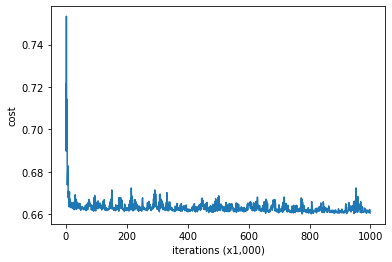

In [245]:
import matplotlib.pyplot as plt

# plot the cost
plt.plot(loss_list)
plt.ylabel('cost')
plt.xlabel('iterations (x1,000)')
plt.show()

* https://medium.com/@martinpella/how-to-use-pre-trained-word-embeddings-in-pytorch-71ca59249f76